In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter

In [3]:
df = pd.read_csv("vacancies.csv")
df.head()

,title,company,salary_from,salary_to,salary_currency,skills,experience,has_higher_education,requirements,responsibilities
0,DevOps-инженер,Цифров,NaN,NaN,NaN,"Kubernetes, DevOps, Grafana, Prometheus, Rabbi...",От 3 до 6 лет,False,NaN,NaN
1,LLMOps engineer,CoIT,NaN,400000.0,RUR,"Kubernetes, Azure, CI/CD, AWS, GCP (Good Clini...",От 3 до 6 лет,True,NaN,NaN
2,Data Engineer (Big Data),Платформа ОФД,NaN,NaN,NaN,"Python, Java, Scala, SQL, Big Data, Hadoop",От 1 года до 3 лет,False,NaN,NaN
3,Бизнес-аналитик (ООО Салют для бизнеса),Салют для Бизнеса,NaN,NaN,NaN,"Бизнес-анализ, Управление ожиданиями, LLM, ML,...",От 1 года до 3 лет,False,NaN,NaN
4,Senior ML Engineer/ML Team Lead (CV),ДВ СМАРТ,200000.0,350000.0,RUR,"Python, Управление командой, PyTorch, Алгоритм...",От 3 до 6 лет,True,NaN,NaN


In [4]:
df["avg_salary"] = df[["salary_from", "salary_to"]].mean(axis=1)

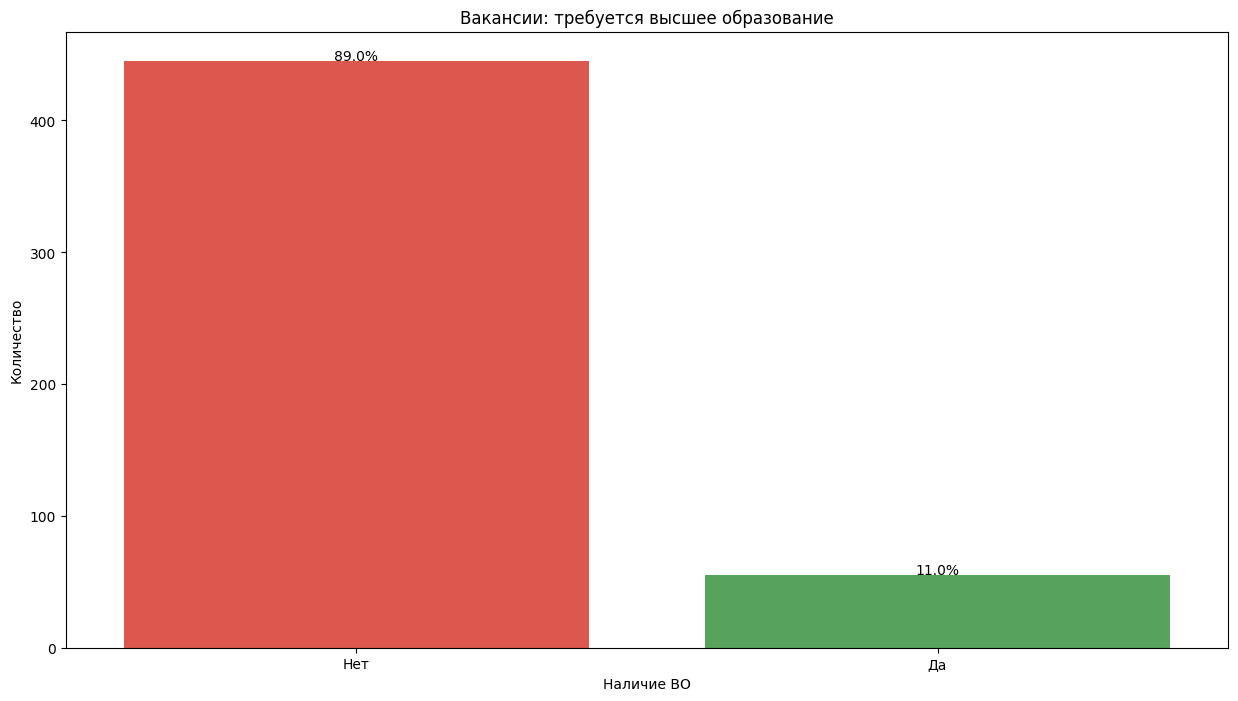

In [19]:
plt.figure(figsize=(15,8))
ax = sns.countplot(
    x="has_higher_education",
    hue="has_higher_education",  
    data=df,
    palette={False: "#F44336", True: "#4CAF50"},  
    legend=False  
)

total = len(df)
for p in ax.patches:
    height=p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2.,
        height + 1,
        f'{height/total*100:.1f}%',
        ha="center"
    )

plt.xticks([0, 1], ["Нет", "Да"])
plt.title("Вакансии: требуется высшее образование")
plt.xlabel("Наличие ВО")
plt.ylabel("Количество")

plt.show()


In [ ]:
salary_means = df.groupby("has_higher_education")["avg_salary"].mean().reset_index()
salary_means['has_higher_education'] = salary_means['has_higher_education'].map({False: "Нет", True: "Да"})

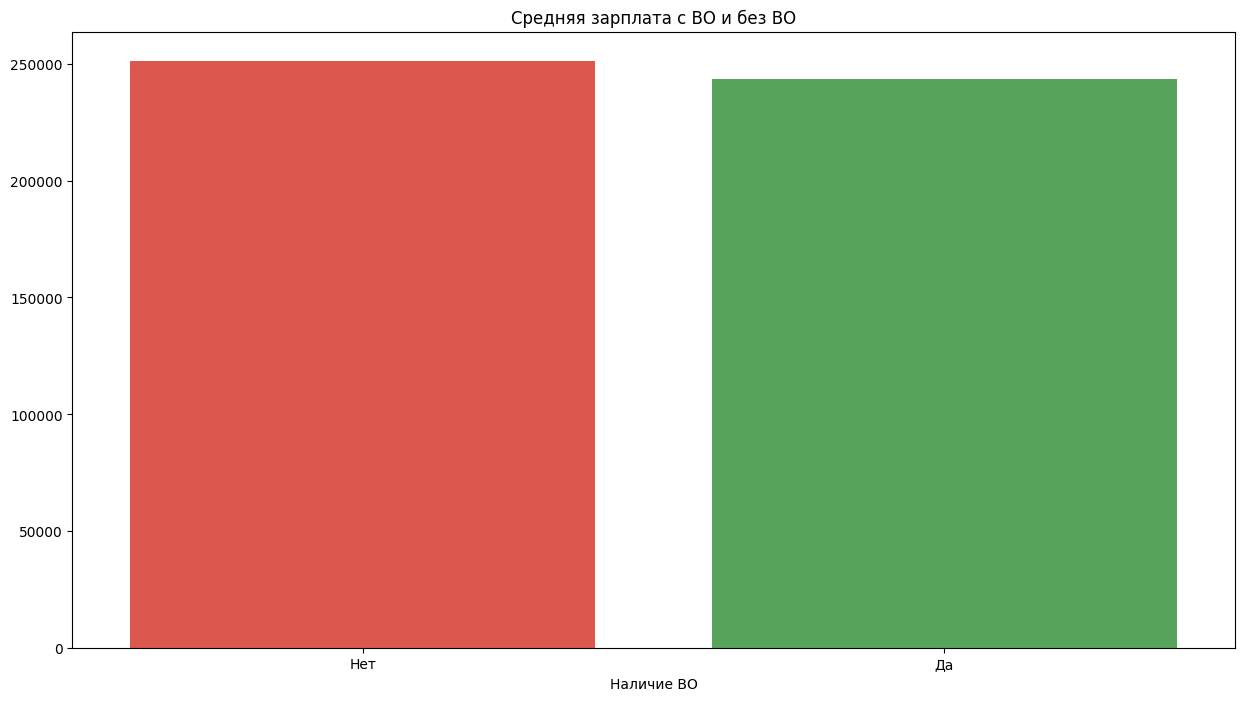

In [31]:
plt.figure(figsize=(15,8))
ax = sns.barplot(
    x="has_higher_education",
    y="avg_salary",
    hue="has_higher_education",
    data=salary_means,
    palette={'Нет': "#F44336", "Да": "#4CAF50"},
    legend=False
)

plt.title("Средняя зарплата с ВО и без ВО")
plt.xlabel("Наличие ВО")
plt.ylabel("")

plt.show()

In [34]:
def get_top_skills(data, top_n=10):
    all_skills = ", ".join(data.dropna()).split(", ")
    return Counter(all_skills).most_common(top_n)

In [38]:
skills_higher = get_top_skills(df[df["has_higher_education"] == True]["skills"])
skills_no_higher = get_top_skills(df[df["has_higher_education"] == False]["skills"])

df_higher = pd.DataFrame(skills_higher, columns=["skill", "count"])
df_no_higher = pd.DataFrame(skills_no_higher, columns=["skill", "count"])

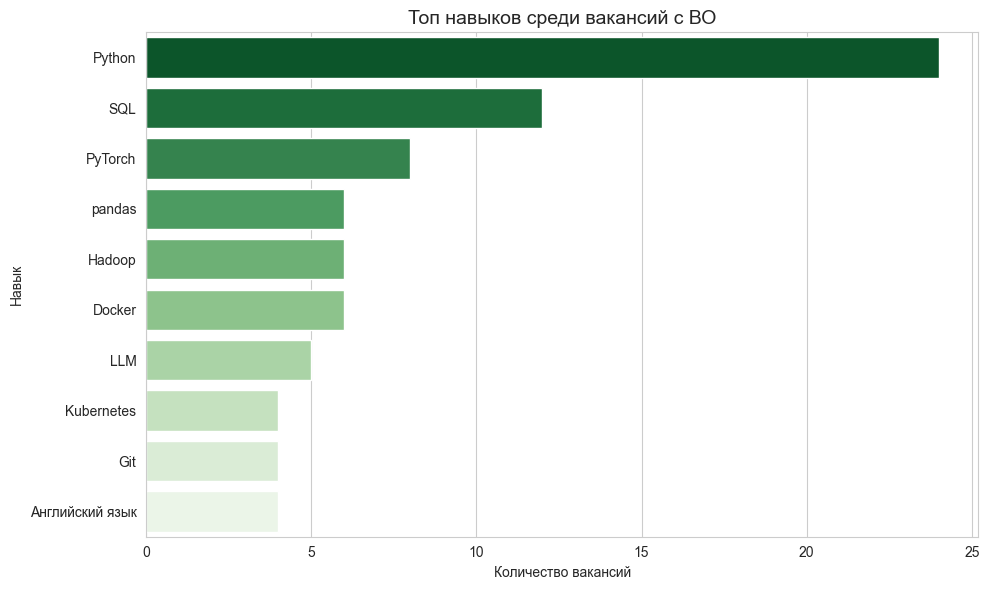

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(10,6))
ax = sns.barplot(
    x="count",
    y="skill",
    hue="skill",            
    data=df_higher,
    dodge=False,            
    palette=sns.color_palette("Greens_r", len(df_higher)), 
    legend=False             
)

plt.title("Топ навыков среди вакансий с ВО", fontsize=14)
plt.xlabel("Количество вакансий")
plt.ylabel("Навык")

plt.tight_layout()
plt.show()


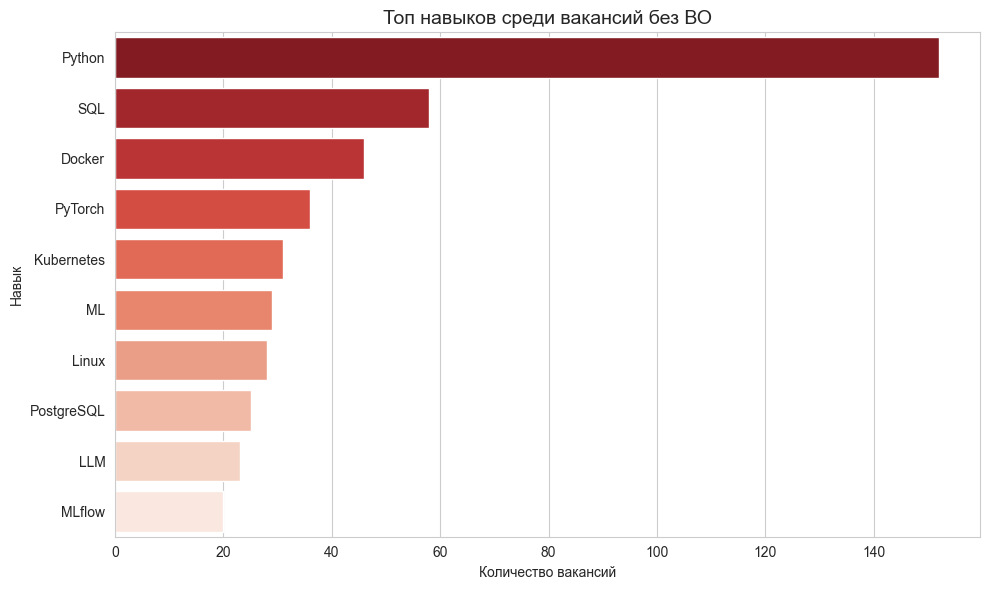

In [62]:

plt.figure(figsize=(10,6))
ax = sns.barplot(
    x="count", 
    y="skill", 
    hue="skill", 
    data=df_no_higher, 
    palette="Reds_r",
    legend=False
)
plt.title("Топ навыков среди вакансий без ВО", fontsize=14)
plt.xlabel("Количество вакансий")
plt.ylabel("Навык")

plt.tight_layout()
plt.show()
